In unimanual, the speed of which reach is performed could be different across hands and directions. The bimanual reaches I anticipate to be overall slower. Furthermore, I hypothesize that mathced and mirror are similar to each other but different from unmatched.

In [9]:
import os
import sys
from pathlib import Path
import glob
import getpass
import importlib

import numpy as np
import pandas as pd
import scipy.io as sio
from statsmodels.stats.anova import AnovaRM

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import utils
importlib.reload(utils)

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist')
fMRI_behavDir = os.path.join(baseDir,'data','fMRI','behavioural')
train_behavDir = os.path.join(baseDir,'data','training')
anaDir = os.path.join(baseDir,'analysis')
figDir = os.path.join(baseDir,'figures')

path = {'baseDir': baseDir,
        'fMRI_behavDir': fMRI_behavDir,
        'train_behavDir': train_behavDir,
        'anaDir': anaDir}



## Unimanual MT

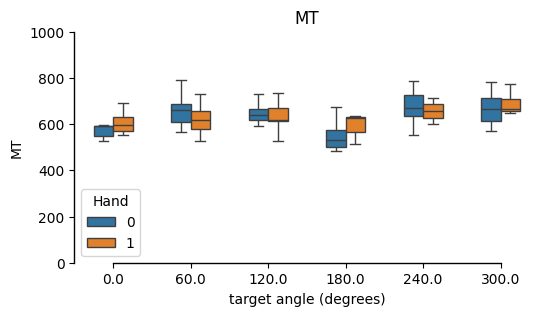

                     Anova
                   F Value Num DF  Den DF Pr > F
------------------------------------------------
targetAngle_L      16.0549 5.0000 30.0000 0.0000
Hand                0.0016 1.0000  6.0000 0.9692
targetAngle_L:Hand  3.6088 5.0000 30.0000 0.0113



In [10]:
ana = pd.read_csv(os.path.join(anaDir, 'bmw.csv'))
df_uni = ana[ana.Uni_or_Bi == 0]

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=df_uni, x="targetAngle_L", y="MT", hue="Hand", width=0.5, fliersize=0)
plt.xlabel('target angle (degrees)')
plt.title(f'MT')
plt.ylim((0,1000))
utils.please.make_it_pretty(ax=ax)
# plt.savefig(os.path.join(figDir, 'behaviour', f'unimanual_MT.pdf'), bbox_inches="tight")
plt.show()

# ANOVA RM:
table = AnovaRM(data=df_uni, depvar='MT', subject='sn', within=['targetAngle_L', 'Hand'])
results = table.fit()
print(results)

